<a href="https://colab.research.google.com/github/pachterlab/BTRBP_2020/blob/master/notebooks/Covid19_NPR_reanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://gist.githubusercontent.com/sbooeshaghi/6caf7976aaa21a2d378c4511def486e1/raw/5378bd2248066032fce7273e3e66cfb6f335bf82/Covid19-NPR-data.txt

--2020-10-06 20:27:10--  https://gist.githubusercontent.com/sbooeshaghi/6caf7976aaa21a2d378c4511def486e1/raw/5378bd2248066032fce7273e3e66cfb6f335bf82/Covid19-NPR-data.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348965 (341K) [text/plain]
Saving to: ‘Covid19-NPR-data.txt’

Covid19-NPR-data.tx 100%[===================>] 340.79K  --.-KB/s    in 0.04s   

2020-10-06 20:27:11 (8.06 MB/s) - ‘Covid19-NPR-data.txt’ saved [348965/348965]



In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
with open("Covid19-NPR-data.txt", 'r') as f:
  d = json.load(f)

In [4]:
s = "surveillance"
cs = {"surveillance": s, "surviellence":s, "Surveillance":s}

In [5]:
df = pd.DataFrame(d["schools"]).drop("tot undergrad", 1).rename(columns={"most_aggressive":"testing"}).replace({"testing":cs})

In [6]:
df

,IPEDS UnitID,Institution Name,Mode of Instruction: C2i Tiny Categorization,testing,total undergrad,daily_three_wk_cases_per100k
0,100654,Alabama A & M University,Hybrid or Hyflex,no clear plan,4842.0,17.762536
1,100663,University of Alabama at Birmingham,Primarily or Fully Online,surveillance,10042.0,23.911729
2,100690,Amridge University,Primarily or Fully Online,no clear plan,175.0,18.754444
3,100706,University of Alabama in Huntsville,Hybrid or Hyflex,surveillance,6393.0,17.762536
4,100724,Alabama State University,Hybrid or Hyflex,surveillance,3643.0,18.754444
...,...,...,...,...,...,...
1437,487524,Husson University,Primarily or Fully Online,surveillance,2394.0,0.312978
1438,487603,Northwest University-College of Adult and Prof...,Hybrid or Hyflex,at risk,455.0,4.527735
1439,488679,Indiana Wesleyan University-National & Global,Primarily or Fully Online,no clear plan,5450.0,14.408293
1440,489779,Purdue University Global-Indianapolis,Primarily or Fully Online,no clear plan,109.0,12.149353


In [7]:
order=["regular testing", "surveillance", "at risk", "no clear plan"][::-1]

In [30]:
mask = df[df["daily_three_wk_cases_per100k"].notnull()].eval("`total undergrad`>=5000")

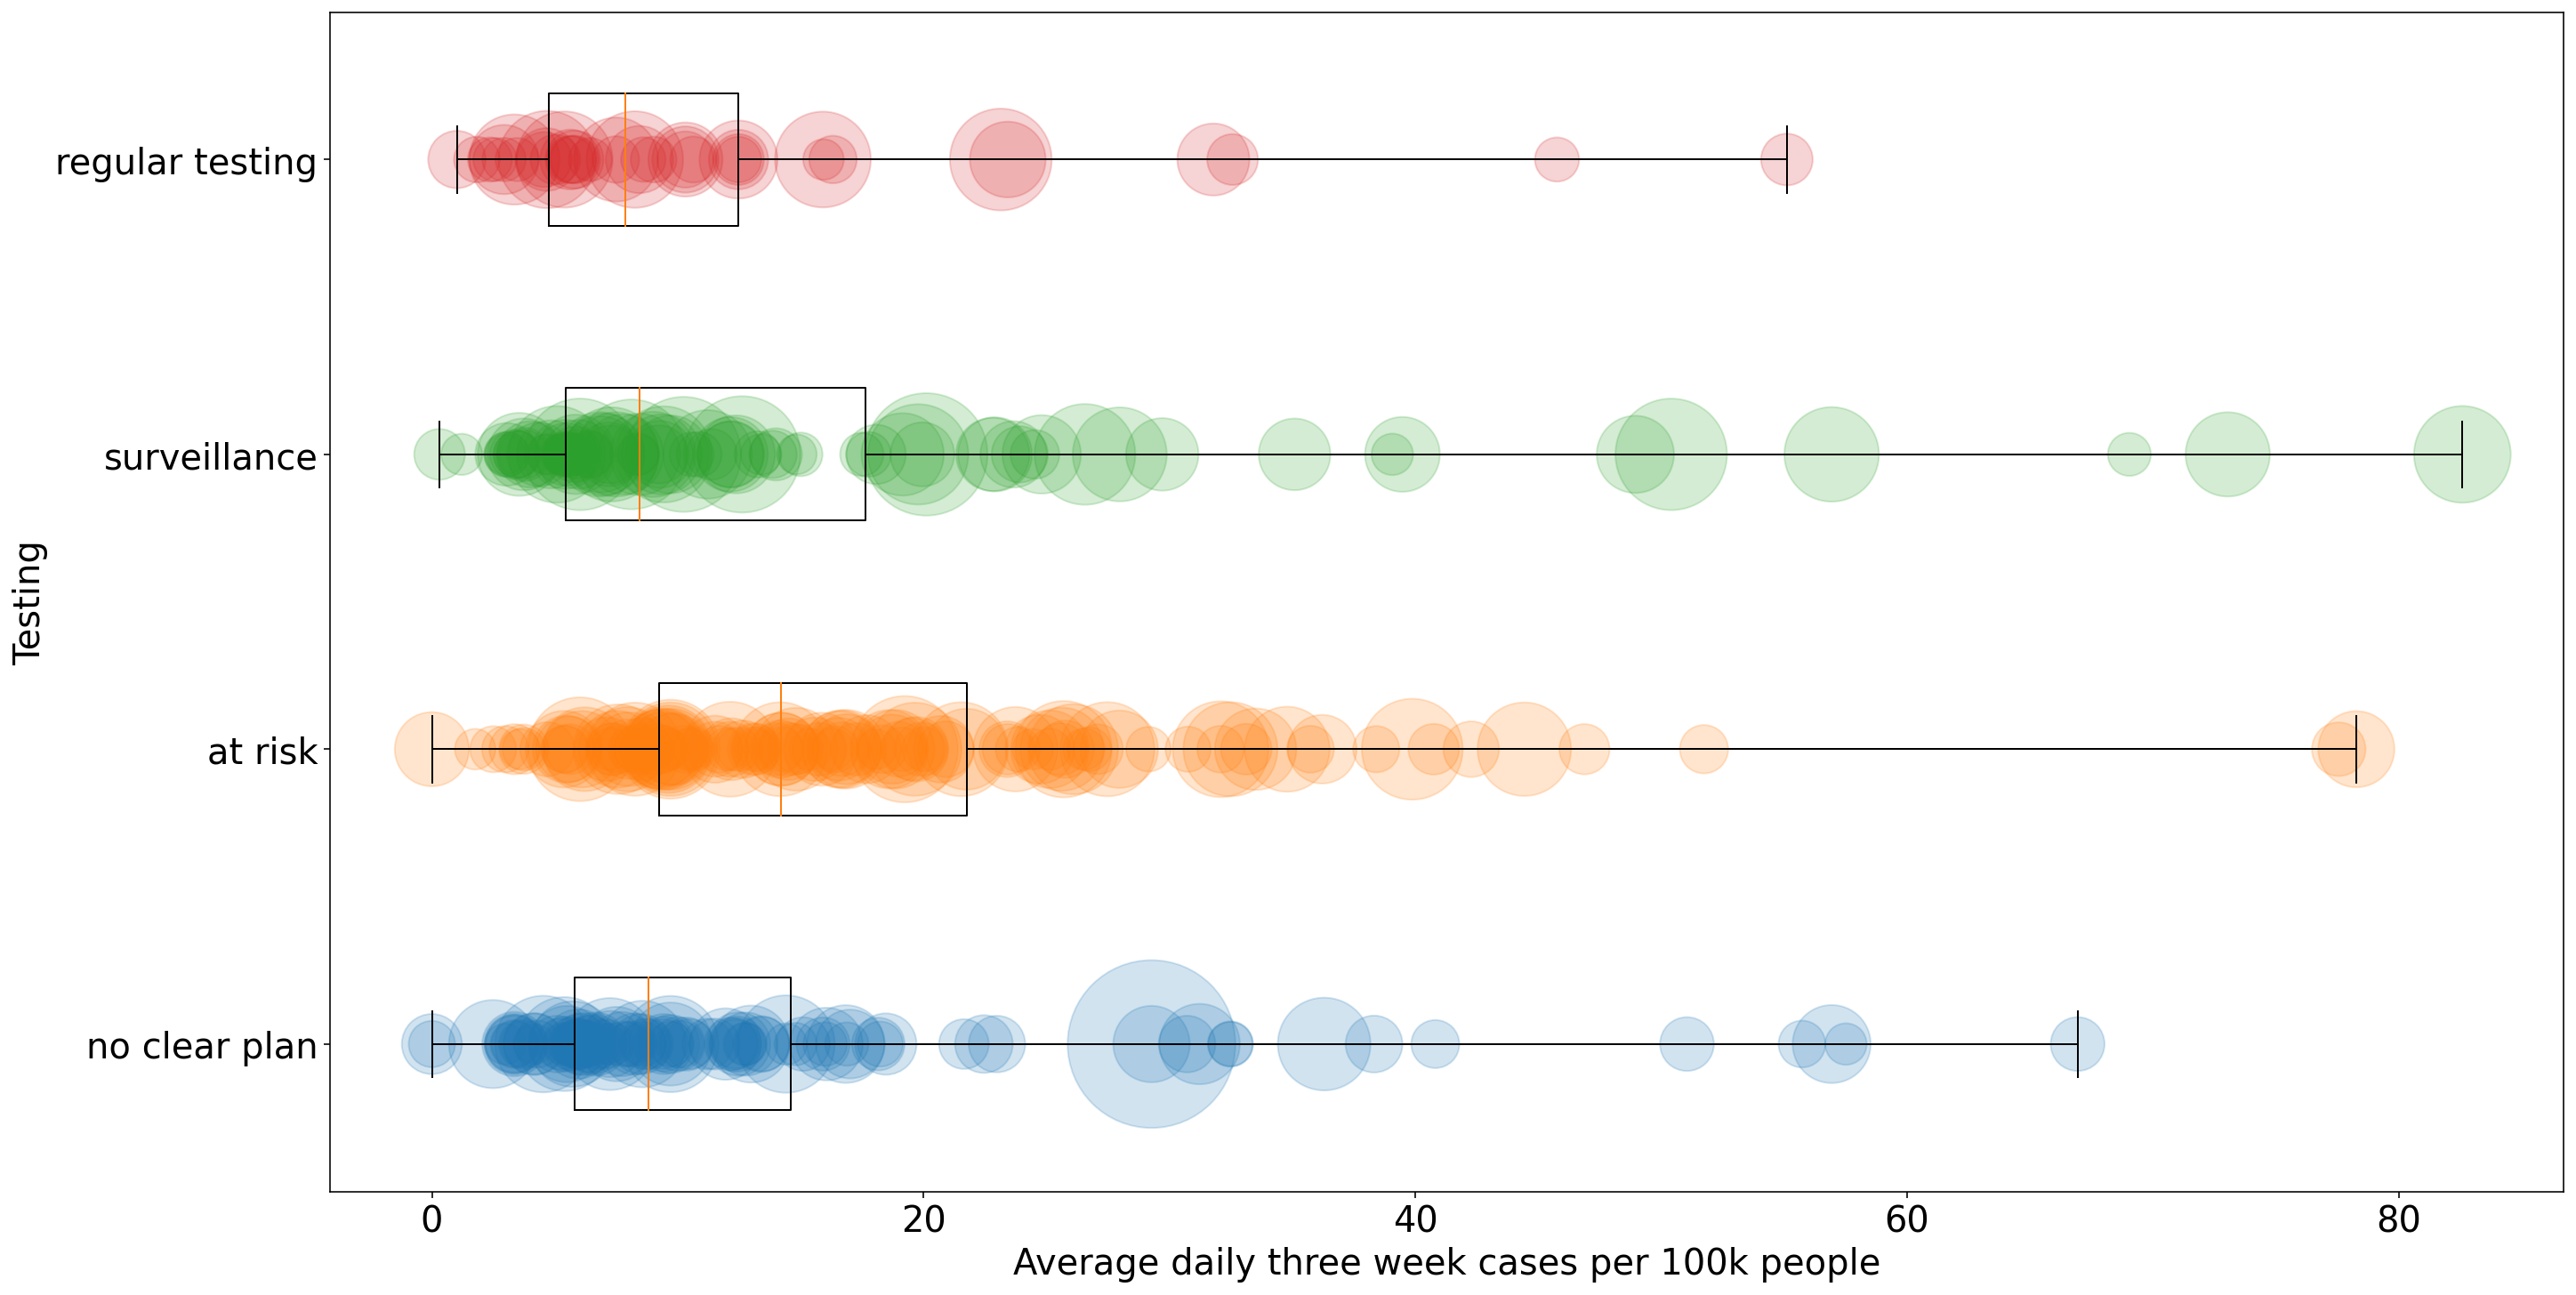

In [31]:
v = df[df["daily_three_wk_cases_per100k"].notnull()][mask].groupby("testing")["daily_three_wk_cases_per100k"].apply(list)[order]
u = df[df["daily_three_wk_cases_per100k"].notnull()][mask].groupby("testing")["total undergrad"].apply(list)[order]

fig, ax = plt.subplots(figsize=(20,10), constrained_layout=True)

labels = v.index.values

data = v.values
ax.boxplot(data, whis=(0, 100), vert=False,showmeans=False)

for i in range(len(data)):
    sze = np.array(u[i])/10
    y = data[i]
    #x = np.random.normal(1+i, 0.04, size=len(y))
    x = [1+i]*len(y)
    ax.scatter(y, x, alpha=0.2,s=sze)

kwd = {
    "ylabel" : "Testing",
    "xlabel": "Average daily three week cases per 100k people",
    "yticklabels":labels
}
ax.set(**kwd)

fig.savefig("./npr.png",bbox_inches='tight', dpi=300)

fig.show()

In [22]:
df.query("testing=='at risk'").sort_values("daily_three_wk_cases_per100k", ascending=False).iloc[-1]

IPEDS UnitID                                                          231095
Institution Name                                            Sterling College
Mode of Instruction: C2i Tiny Categorization    Primarily or Fully In-Person
testing                                                              at risk
total undergrad                                                          109
daily_three_wk_cases_per100k                                       -0.176125
Name: 1273, dtype: object

In [9]:
  df.iloc[df["daily_three_wk_cases_per100k"].argmax()]

IPEDS UnitID                                                        200059
Institution Name                                Dickinson State University
Mode of Instruction: C2i Tiny Categorization              Hybrid or Hyflex
testing                                                      no clear plan
total undergrad                                                        900
daily_three_wk_cases_per100k                                       112.965
Name: 892, dtype: object

In [10]:
df.query("`Institution Name` == 'The University of Alabama'")

,IPEDS UnitID,Institution Name,Mode of Instruction: C2i Tiny Categorization,testing,total undergrad,daily_three_wk_cases_per100k
5,100751,The University of Alabama,Primarily or Fully In-Person,surveillance,29586.0,82.589268


In [11]:
df.query("`Institution Name` == 'University of Wyoming'")

,IPEDS UnitID,Institution Name,Mode of Instruction: C2i Tiny Categorization,testing,total undergrad,daily_three_wk_cases_per100k
1383,240727,University of Wyoming,Primarily or Fully In-Person,regular testing,8457.0,55.114638


In [12]:
  df.query("`Institution Name` == 'Tennessee Technological University'")

,IPEDS UnitID,Institution Name,Mode of Instruction: C2i Tiny Categorization,testing,total undergrad,daily_three_wk_cases_per100k
1183,221847,Tennessee Technological University,Primarily or Fully In-Person,at risk,7999.0,46.880239


In [13]:
  df.query("`Institution Name` == 'Michigan Technological University'")

,IPEDS UnitID,Institution Name,Mode of Instruction: C2i Tiny Categorization,testing,total undergrad,daily_three_wk_cases_per100k
566,171128,Michigan Technological University,Primarily or Fully In-Person,no clear plan,5465.0,57.51544
